In [2]:
!pip install pandas
!pip install numpy
!pip install yfinance
!pip install matplotlib
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
start_date='2020-01-01'
end_date='2020-03-18'
data=yf.download(
    tickers='601318.SS',
    interval = "1d",
    start=start_date,
    end=end_date,
    ignore_tz=True,
    auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,601318.SS,601318.SS,601318.SS,601318.SS,601318.SS
Date,,,,,
2020-01-02,67.056480,67.578168,66.869603,66.885179,77825207
2020-01-03,67.118767,67.648242,66.885178,67.593738,59498001
2020-01-06,66.651588,67.640465,66.573726,66.900753,63644804
2020-01-07,67.079834,67.321210,66.706084,66.970825,45218832
2020-01-08,66.184402,66.184402,66.184402,66.184402,62805311


In [4]:
data['diff']=data['Close'].diff()
data.head()

Price,Close,High,Low,Open,Volume,diff
Ticker,601318.SS,601318.SS,601318.SS,601318.SS,601318.SS,
Date,,,,,,
2020-01-02,67.056480,67.578168,66.869603,66.885179,77825207,NaN
2020-01-03,67.118767,67.648242,66.885178,67.593738,59498001,0.062286
2020-01-06,66.651588,67.640465,66.573726,66.900753,63644804,-0.467178
2020-01-07,67.079834,67.321210,66.706084,66.970825,45218832,0.428246
2020-01-08,66.184402,66.184402,66.184402,66.184402,62805311,-0.895432


In [5]:
data['signal']=np.where(data['diff']>0,1,0)
data.head()

Price,Close,High,Low,Open,Volume,diff,signal
Ticker,601318.SS,601318.SS,601318.SS,601318.SS,601318.SS,,
Date,,,,,,,
2020-01-02,67.056480,67.578168,66.869603,66.885179,77825207,NaN,0
2020-01-03,67.118767,67.648242,66.885178,67.593738,59498001,0.062286,1
2020-01-06,66.651588,67.640465,66.573726,66.900753,63644804,-0.467178,0
2020-01-07,67.079834,67.321210,66.706084,66.970825,45218832,0.428246,1
2020-01-08,66.184402,66.184402,66.184402,66.184402,62805311,-0.895432,0


<Figure size 1000x500 with 0 Axes>

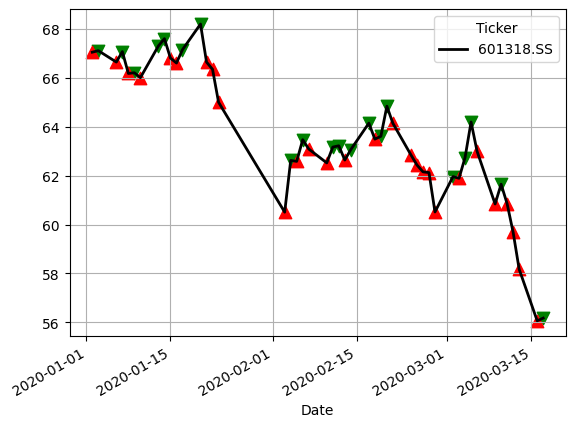

In [6]:
plt.figure(figsize=(10,5))
data['Close'].plot(linewidth=2, color='k',grid=True)
plt.scatter(data['Close'].loc[data.signal==1].index, data['Close'][data.signal==1],marker='v',s=80,c='g')
plt.scatter(data['Close'].loc[data.signal==0].index, data['Close'][data.signal==0],marker='^',s=80,c='r')


In [6]:
#backtesting
data_signal=pd.DataFrame(index=data.index)
data_signal['price']=data['Close']
data_signal['diff']=data_signal['price'].diff()
data_signal=data_signal.fillna(0.0)
data_signal['signal']=np.where(data_signal['diff']>=0,0,1)
data_signal['order']=data_signal['signal'].diff()*100
data_signal.head()

,price,diff,signal,order
Date,,,,
2020-01-02,67.056480,0.000000,0,NaN
2020-01-03,67.118767,0.062286,0,0.0
2020-01-06,66.651588,-0.467178,1,100.0
2020-01-07,67.079834,0.428246,0,-100.0
2020-01-08,66.184402,-0.895432,1,100.0


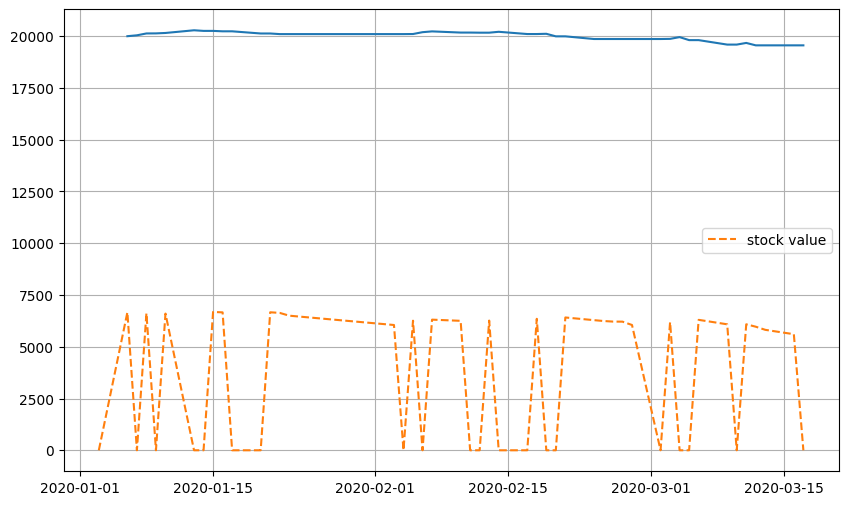

In [7]:
initial_cash=20000.00
data_signal['stock']=data_signal['order']*data_signal['price']
data_signal['cash']=initial_cash-\
    (data_signal['order'].diff()*data_signal['price']).cumsum()
data_signal['total']=data_signal['stock']+data_signal['cash']
plt.figure(figsize=(10,6))
plt.plot(data_signal['total'])
plt.plot(data_signal['order'].cumsum()*data_signal['price'],'--',label='stock value')
plt.grid()
plt.legend(loc='center right')
plt.show()


In [8]:
#moving average
data.columns = data.columns.get_level_values(0)
period=10
avg_10=[]
avg_value=[]
for price in data['Close']:
    avg_10.append(price)
    if len(avg_10)>period:
        del avg_10[0]
    avg_value.append(np.mean(avg_10))
data=data.assign(avg_10=pd.Series(avg_value, index=data.index))
data.head()

Price,Close,High,Low,Open,Volume,diff,signal,avg_10
Date,,,,,,,,
2020-01-02,67.056480,67.578168,66.869603,66.885179,77825207,NaN,0,67.056480
2020-01-03,67.118767,67.648242,66.885178,67.593738,59498001,0.062286,1,67.087624
2020-01-06,66.651588,67.640465,66.573726,66.900753,63644804,-0.467178,0,66.942279
2020-01-07,67.079834,67.321210,66.706084,66.970825,45218832,0.428246,1,66.976667
2020-01-08,66.184402,66.184402,66.184402,66.184402,62805311,-0.895432,0,66.818214


C:\Users\wz1120\AppData\Local\Temp\ipykernel_21272\3273860940.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


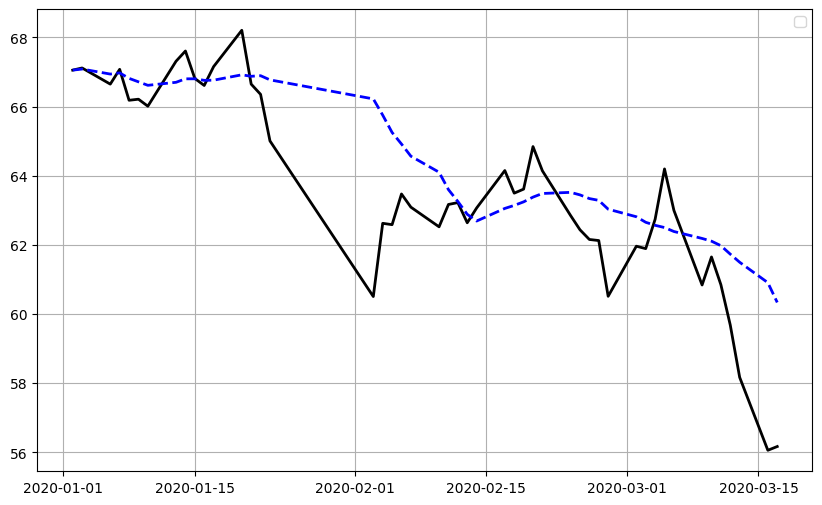

In [9]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'],lw=2,c='k')
plt.plot(data['avg_10'],'--', lw=2,c='b')
plt.legend()
plt.grid()
plt.show()

In [10]:
#MA10 & MA5
strategy=pd.DataFrame(index=data.index)
strategy['signal']=0
strategy['avg_5']=data['Close'].rolling(5).mean()
strategy['avg_10']=data['Close'].rolling(10).mean()
strategy['signal']=np.where(strategy['avg_5']>strategy['avg_10'],1,0)
strategy['order']=strategy['signal'].diff()
strategy.tail(10)

,signal,avg_5,avg_10,order
Date,,,,
2020-03-04,0,61.848930,62.568396,0.0
2020-03-05,0,62.263167,62.503769,0.0
2020-03-06,1,62.759939,62.389309,1.0
2020-03-09,1,62.535693,62.188419,0.0
2020-03-10,1,62.487417,62.109776,0.0
2020-03-11,1,62.108994,61.978962,0.0
2020-03-12,0,61.205774,61.734470,-1.0
2020-03-13,0,60.240260,61.500100,0.0
2020-03-16,0,59.284089,60.909891,0.0


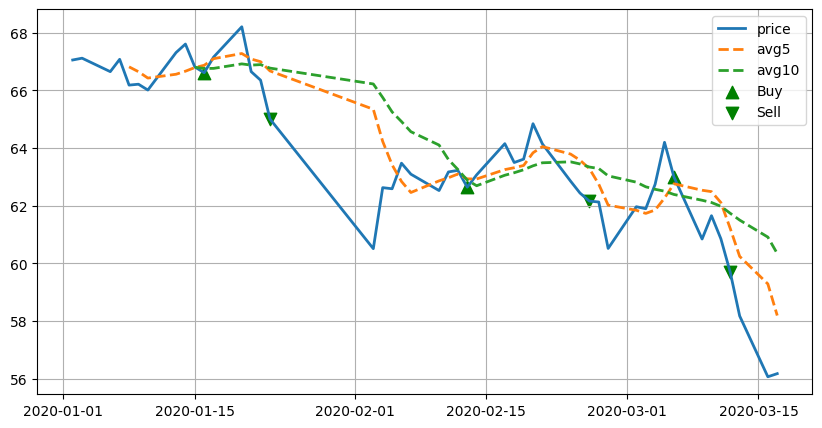

In [11]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'],lw=2,label='price')
plt.plot(strategy['avg_5'],lw=2,ls='--',label='avg5')
plt.plot(strategy['avg_10'],lw=2,ls='--',label='avg10')
plt.scatter(strategy.loc[strategy.order==1].index, data['Close'][strategy.order==1],marker='^',s=80,color='g',label='Buy')
plt.scatter(strategy.loc[strategy.order==-1].index, data['Close'][strategy.order==-1],marker='v',s=80,color='g',label='Sell')
plt.legend()
plt.grid()
plt.show()

In [12]:
#backtesting 
initial_cash=20000
positions=pd.DataFrame(index=strategy.index).fillna(0)
positions['stock']=strategy['signal']*100  #holding volume
portfolio = pd.DataFrame(index=data.index)
portfolio['stock value']=\
    positions.multiply(data['Close'],axis=0)
order=positions.diff()
portfolio['cash']=initial_cash-order.multiply(data['Close'],axis=0).cumsum()
portfolio['total']=portfolio['cash']+portfolio['stock value']
portfolio.tail(10)

,stock value,cash,total
Date,,,
2020-03-04,0.000000,19791.324997,19791.324997
2020-03-05,0.000000,19791.324997,19791.324997
2020-03-06,6299.976349,13491.348648,19791.324997
2020-03-09,6084.293365,13491.348648,19575.642014
2020-03-10,6165.270996,13491.348648,19656.619644
2020-03-11,6085.070038,13491.348648,19576.418686
2020-03-12,0.000000,19459.624863,19459.624863
2020-03-13,0.000000,19459.624863,19459.624863
2020-03-16,0.000000,19459.624863,19459.624863


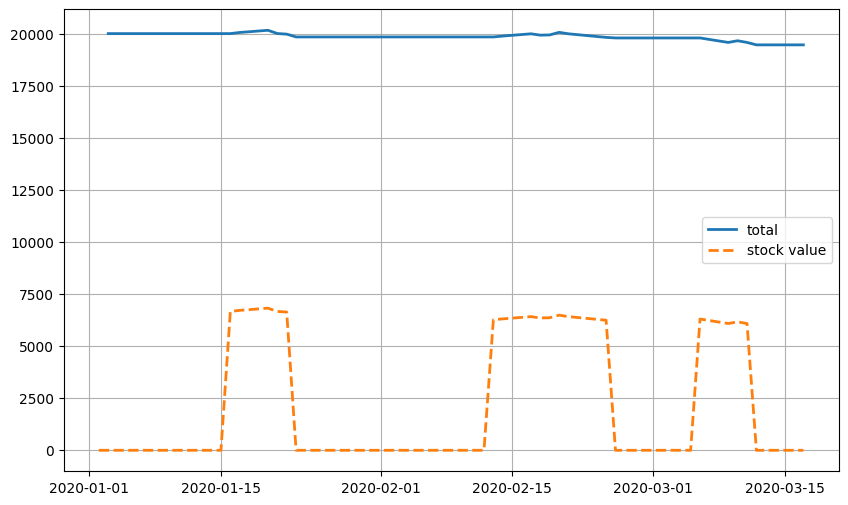

In [13]:
plt.figure(figsize=(10,6))
plt.plot(portfolio['total'],lw=2, label='total')
plt.plot(portfolio['stock value'],lw=2, ls='--',label='stock value')
plt.legend()
plt.grid()
plt.show()

In [14]:
#turtle 
turtle=pd.DataFrame(index=data.index)
turtle['high']=data['Close'].shift(1).rolling(5).max()
turtle['low']=data['Close'].shift(1).rolling(5).min()
turtle['buy']=data['Close']>turtle['high']
turtle['sell']=data['Close']<turtle['low']
turtle.tail()

,high,low,buy,sell
Date,,,,
2020-03-11,64.198860,60.842934,False,False
2020-03-12,64.198860,60.842934,False,True
2020-03-13,62.999763,59.682762,False,True
2020-03-16,61.652710,58.172195,False,True
2020-03-17,61.652710,56.062077,False,False


In [15]:
turtle['orders']=0
position=0
for k in range(len(turtle)):
    if turtle.buy[k] and position==0:
        turtle.orders.values[k]=1
        position=1
    elif turtle.sell[k] and position>0:
        turtle.orders.values[k]=-1
        position=0
turtle.tail(15)      
        

C:\Users\wz1120\AppData\Local\Temp\ipykernel_21272\3139467842.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if turtle.buy[k] and position==0:
C:\Users\wz1120\AppData\Local\Temp\ipykernel_21272\3139467842.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif turtle.sell[k] and position>0:


,high,low,buy,sell,orders
Date,,,,,
2020-02-26,64.845131,62.439148,False,True,0
2020-02-27,64.845131,62.158836,False,True,0
2020-02-28,64.144363,62.127678,False,True,0
2020-03-02,62.851826,60.515903,False,False,0
2020-03-03,62.439148,60.515903,False,False,0
2020-03-04,62.158836,60.515903,True,False,1
2020-03-05,62.742817,60.515903,True,False,0
2020-03-06,64.198860,60.515903,False,False,0
2020-03-09,64.198860,61.894089,False,True,-1


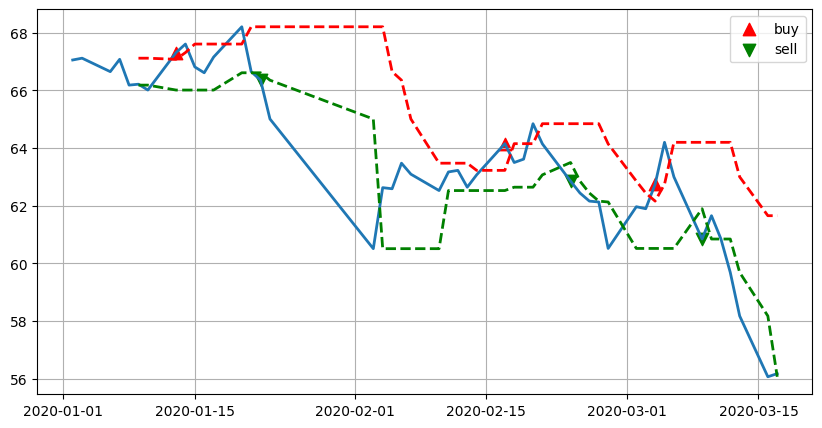

In [16]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'],lw=2)
plt.plot(turtle['high'],lw=2,ls='--',c='r')
plt.plot(turtle['low'],lw=2,ls='--',c='g')
plt.scatter(turtle.loc[turtle.orders==1].index,data['Close'][turtle.orders==1],marker='^', s=80,c='r',label='buy')
plt.scatter(turtle.loc[turtle.orders==-1].index,data['Close'][turtle.orders==-1],marker='v',s=80,c='g',label='sell')
plt.legend()
plt.grid()
plt.show()

C:\Users\wz1120\AppData\Local\Temp\ipykernel_21272\1325788405.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


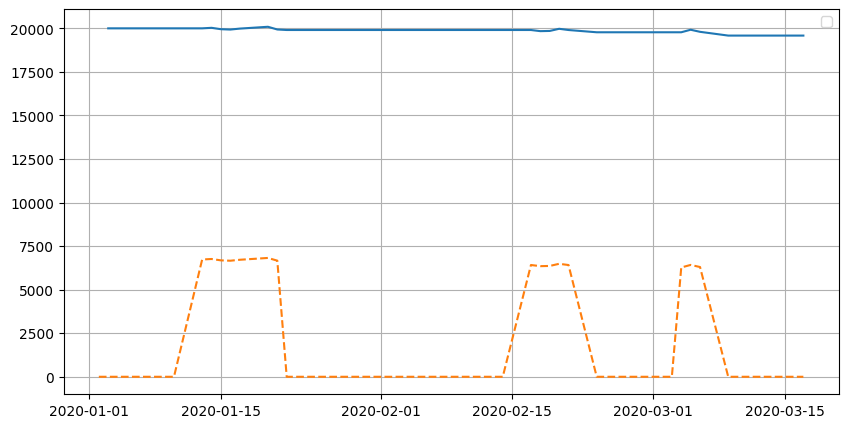

,stock,hoding values,cash,total
Date,,,,
2020-02-28,0.000000,0.000000,19774.195480,19774.195480
2020-03-02,0.000000,0.000000,19774.195480,19774.195480
2020-03-03,0.000000,0.000000,19774.195480,19774.195480
2020-03-04,6274.281693,6274.281693,13499.913788,19774.195480
2020-03-05,6419.886017,6419.886017,13499.913788,19919.799805
2020-03-06,6299.976349,6299.976349,13499.913788,19799.890137
2020-03-09,0.000000,0.000000,19584.207153,19584.207153
2020-03-10,0.000000,0.000000,19584.207153,19584.207153
2020-03-11,0.000000,0.000000,19584.207153,19584.207153


In [22]:
#backtesting
initial_cash=20000
positions=pd.DataFrame(index=turtle.index).fillna(0.0)
positions['stock']=100*turtle['orders'].cumsum()
portfolio=positions.multiply(data['Close'],axis=0)
portfolio['hoding values']=(positions.multiply(data['Close'],axis=0))
pos_diff=positions.diff()
portfolio['cash']=initial_cash-(pos_diff.multiply(data['Close'],axis=0)).cumsum()
portfolio['total']=portfolio['cash']+portfolio['hoding values']
plt.figure(figsize=(10,5))
plt.plot(portfolio['total'])
plt.plot(portfolio['hoding values'],'--')
plt.grid()
plt.legend()
plt.show()
portfolio.tail(13)